In [1]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec   
%matplotlib inline
import ROOT
import root_numpy

In [2]:
# functions for calling the outputs from nSort, the geometry and defining the final plots
def get_position(filename):
    f = ROOT.TFile(filename)
    f.cd('events')
    tree = f.Get('events/events')
    out=root_numpy.tree2array(tree)
    x=np.array([out['X'][i][0] for i in range(len(out['X']))])
    y=np.array([out['Y'][i][0] for i in range(len(out['Y']))])
    z=np.array([out['Z'][i][0] for i in range(len(out['Z']))])
    r=[]
    for i in range(len(out['X'])):
        r.append(x[i]*x[i]+y[i]*y[i])                          # filling with entries for r²
    return r, z, x, y

def get_geometry(filename):
    f = ROOT.TFile(filename)
    f.cd('events')
    tree = f.Get('events/events')
    x_geometry=[]
    y_geometry=[]
    z_geometry=[]
    r_geometry=[]
    for entry in tree:
        x_geometry.append(entry.xp_pri)
        y_geometry.append(entry.yp_pri)
        z_geometry.append(entry.zp_pri)
        r_geometry.append(np.sqrt(entry.xp_pri*entry.xp_pri+entry.yp_pri*entry.yp_pri))
    return r_geometry, z_geometry, x_geometry, y_geometry


def plot1(color, label, alpha=0.9):
    ax.scatter(r, z, color=color, edgecolor='none', marker='s', s=3, alpha=alpha, label=label)
    colors.append(color)
    return

TClass::Init:0: RuntimeWarning: no dictionary for class ROOT::TIOFeatures is available


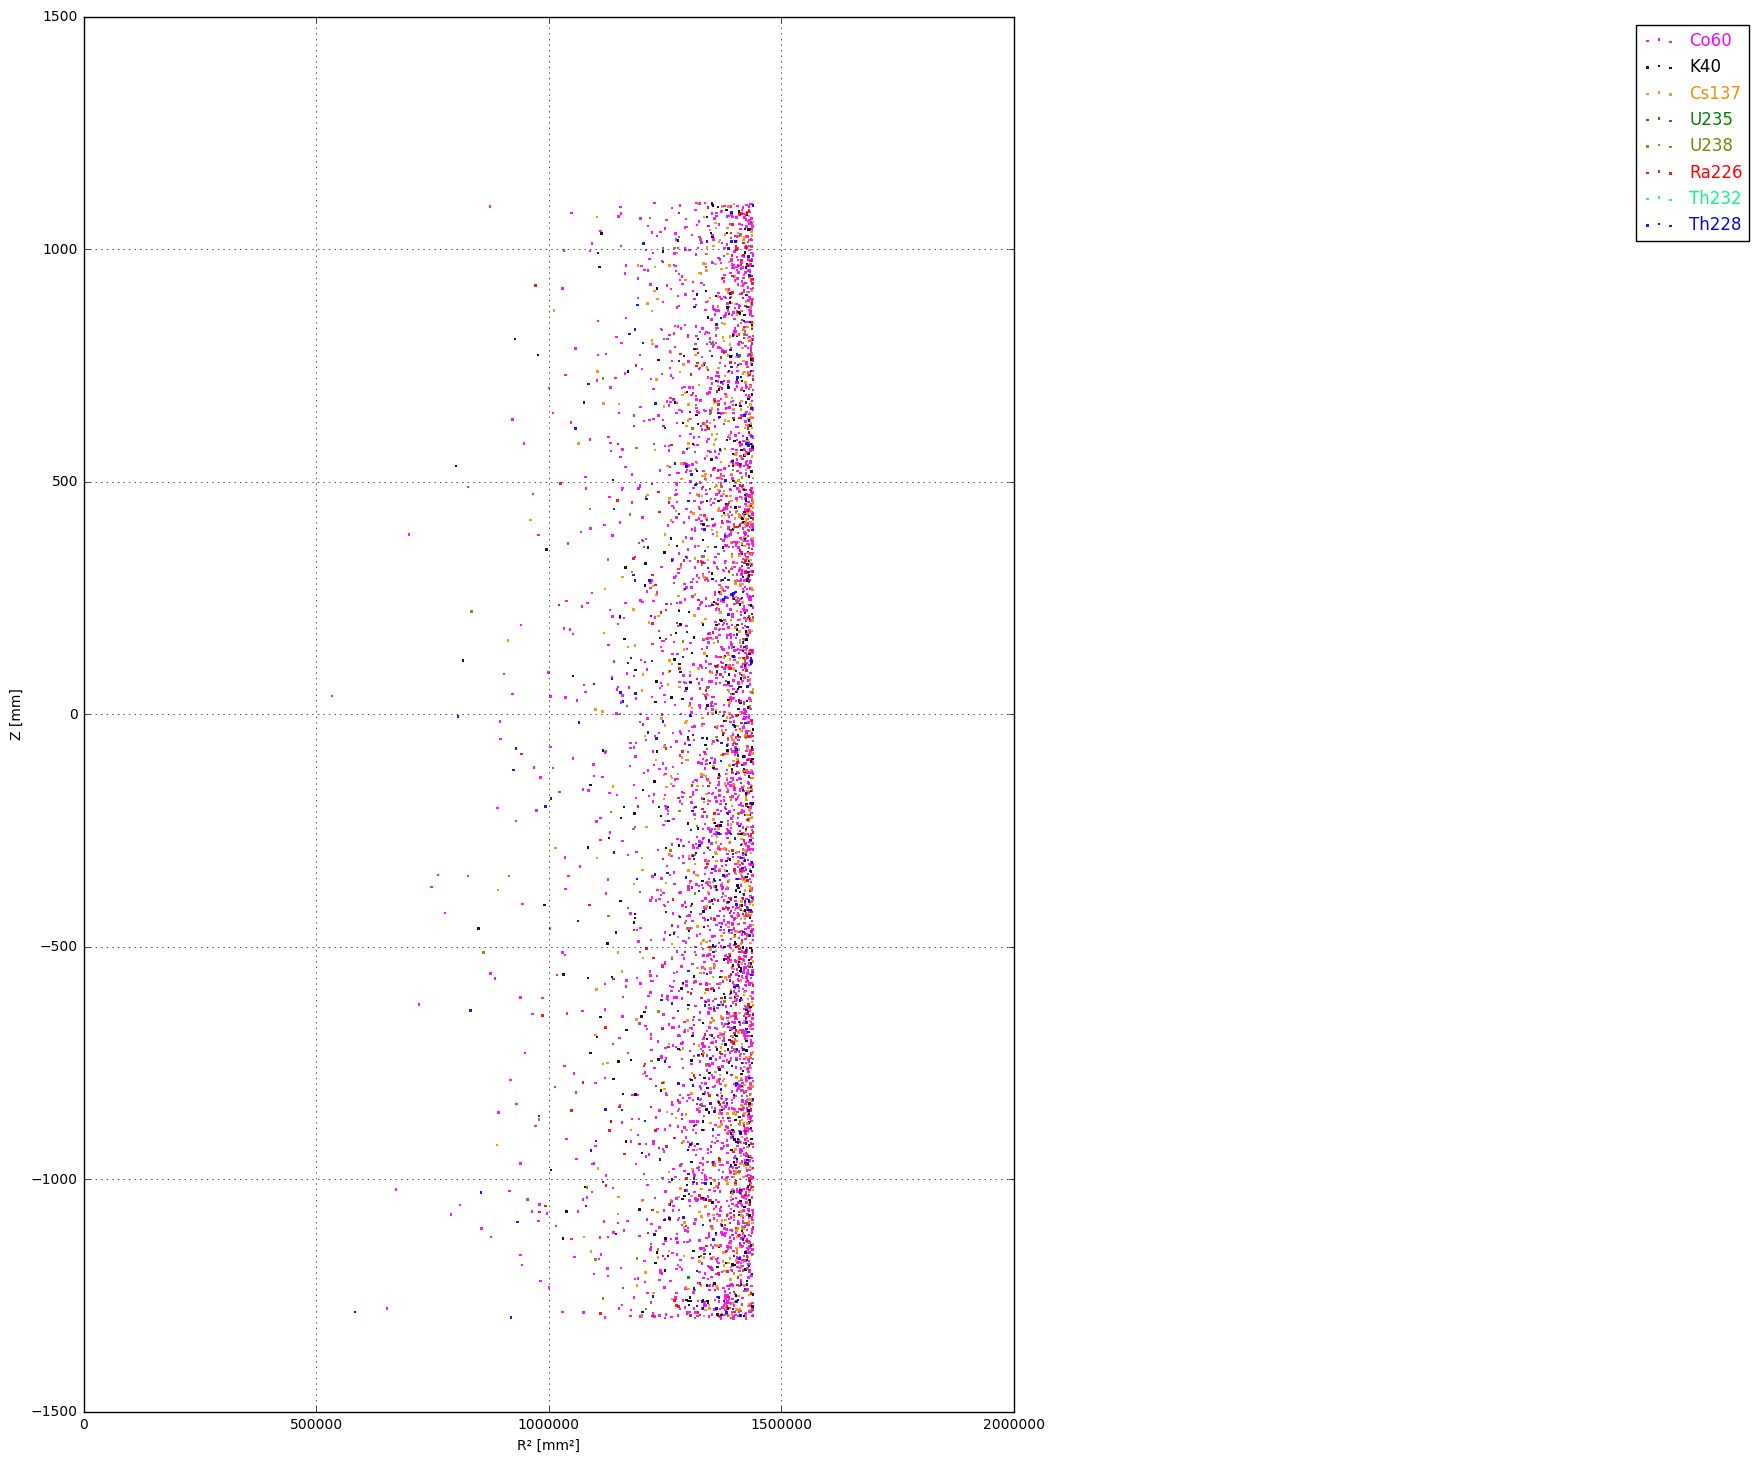

In [3]:
fig = plt.figure(figsize=(12,18))
ax = plt.subplot(111)
colors=[]

r, z, x, y = get_position('../10cm_FC/PTFE_Co60_Sort.root')
plot1('fuchsia', label='Co60')

r, z, x, y = get_position('../10cm_FC/PTFE_K40_Sort.root')
plot1('black', label='K40')

r, z, x, y = get_position('../10cm_FC/PTFE_Cs137_Sort.root')
plot1('darkorange', label='Cs137')

r, z, x, y = get_position('../10cm_FC/PTFE_U235_Sort.root')
plot1('g', label='U235')

r, z, x, y = get_position('../10cm_FC/PTFE_U238_Sort.root')
plot1('olive', label='U238')

r, z, x, y = get_position('../10cm_FC/PTFE_Ra226_Sort.root')
plot1('r', label='Ra226')

r, z, x, y = get_position('../10cm_FC/PTFE_Th232_Sort.root')
plot1('springgreen', label='Th232')

r, z, x, y = get_position('../10cm_FC/PTFE_Th228_Sort.root')
plot1('b', label='Th228')
'''
r_geometry, z_geometry, x_geometry, y_geometry = get_geometry('../10cm_FC/PTFE_reflector.root')
plot1('black', label='PTFE_reflector')

r_geometry, z_geometry, x_geometry, y_geometry = get_geometry('../10cm_FC/PTFE_Pillar.root')
plot1('black', label='PTFE_pillar')
'''

leg = ax.legend(loc=1, bbox_to_anchor=[1.8,1.])
for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)

plt.ylim(-1500, 1500)
plt.xlim(0,2000000)
plt.xlabel('R² [mm²]')
plt.ylabel('Z [mm]')
plt.grid()

plt.show()

In [4]:
def plot2(color, label, alpha=0.9):
    ax.scatter(x, y, color=color, edgecolor='none', marker='s', s=3, alpha=alpha, label=label)
    colors.append(color)
    return

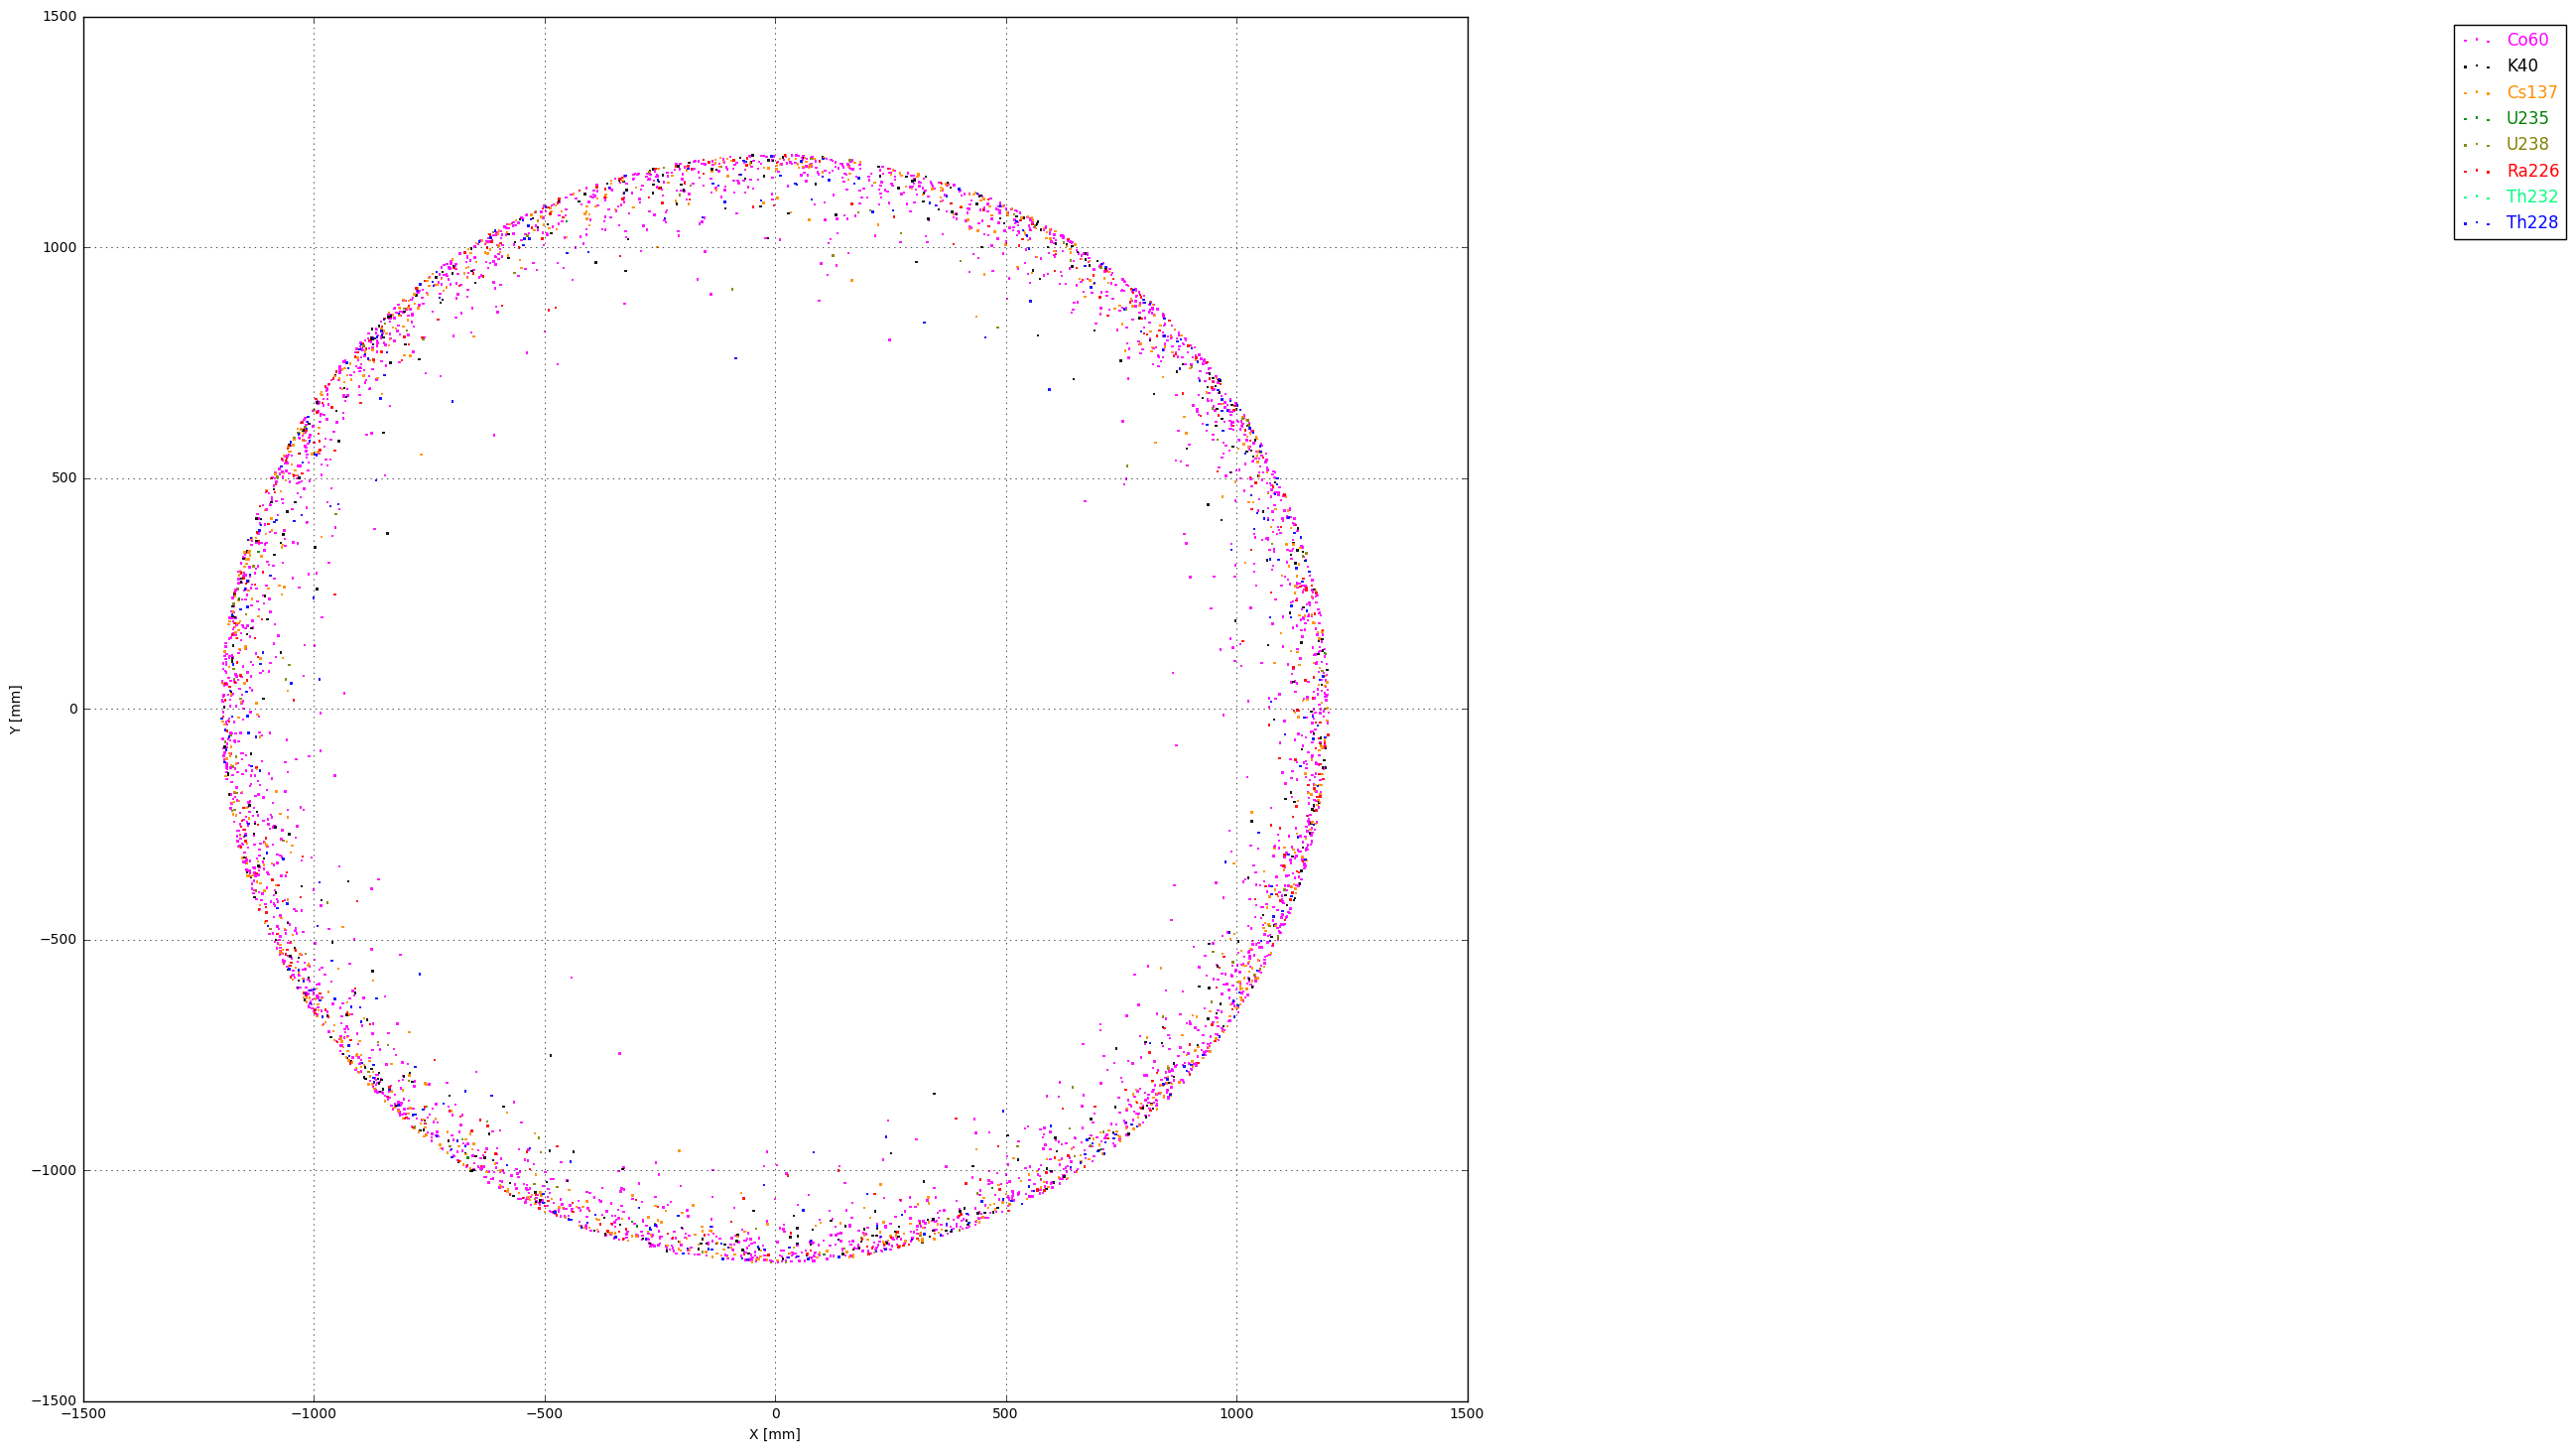

In [5]:
fig = plt.figure(figsize=(18,18))
ax = plt.subplot(111)
colors=[]

r, z, x, y = get_position('../10cm_FC/PTFE_Co60_Sort.root')
plot2('fuchsia', label='Co60')

r, z, x, y = get_position('../10cm_FC/PTFE_K40_Sort.root')
plot2('black', label='K40')

r, z, x, y = get_position('../10cm_FC/PTFE_Cs137_Sort.root')
plot2('darkorange', label='Cs137')

r, z, x, y = get_position('../10cm_FC/PTFE_U235_Sort.root')
plot2('g', label='U235')

r, z, x, y = get_position('../10cm_FC/PTFE_U238_Sort.root')
plot2('olive', label='U238')

r, z, x, y = get_position('../10cm_FC/PTFE_Ra226_Sort.root')
plot2('r', label='Ra226')

r, z, x, y = get_position('../10cm_FC/PTFE_Th232_Sort.root')
plot2('springgreen', label='Th232')

r, z, x, y = get_position('../10cm_FC/PTFE_Th228_Sort.root')
plot2('b', label='Th228')
'''
r_geometry, z_geometry, x_geometry, y_geometry = get_geometry('../10cm_FC/PTFE_reflector.root')
plot2('black', label='PTFE_reflector')

r_geometry, z_geometry, x_geometry, y_geometry = get_geometry('../10cm_FC/PTFE_Pillar.root')
plot2('black', label='PTFE_pillar')
'''

leg = ax.legend(loc=1, bbox_to_anchor=[1.8,1.])
for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)

plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.grid()

plt.show()

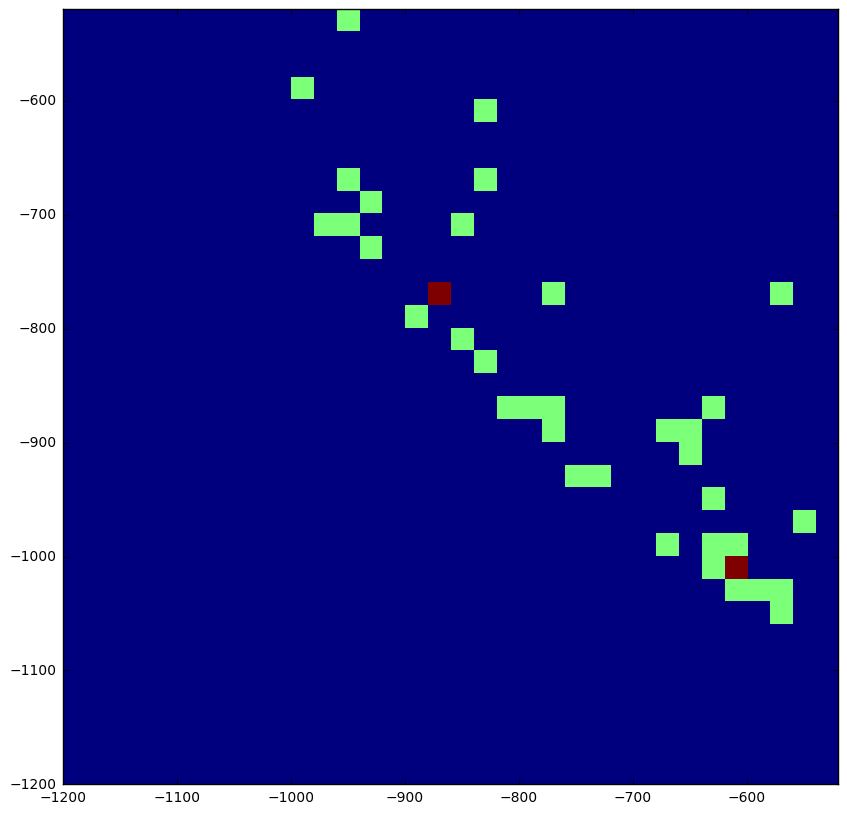

In [6]:
xedges = np.arange(-1200, -500, 20)
yedges = np.arange(-1200, -500, 20)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
fig = plt.figure(figsize=(10, 10))

plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

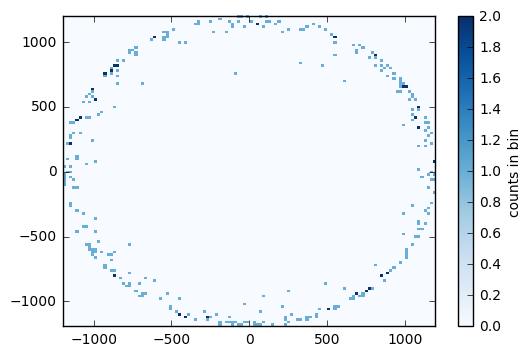

In [7]:
plt.hist2d(x, y, bins=120, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')